In [1]:
# Description: This project aims to predict incidents likely to be reopened in an IT service management system.By analyzing historical incident data, 
#              the goal is to identify patterns and predict which incidents are more likely to require further attention, improving response time.


# Author: BARNALIKKA PRADHAN

# Date: 22nd May 2025

# Dependencies: Pandas, NumPy, SciPy, Seaborn, Matplotlib, scikit-learn

In [2]:
# import libraries
import pandas as pd
import numpy as np
import warnings
from sklearn.exceptions import DataConversionWarning

# Suppress specific warnings
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings('ignore', category=RuntimeWarning)


In [3]:
df = pd.read_csv("incident_event_log.csv", low_memory = False)

In [4]:
df['reopen_count'].value_counts()

reopen_count
0    139398
1      1918
2       190
3       107
4        48
5        24
6        18
7         5
8         4
Name: count, dtype: int64

In [5]:
df.replace('?', np.nan, inplace = True)

In [6]:
df.shape

(141712, 36)

In [7]:
df.columns

Index(['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by',
       'opened_at', 'sys_created_by', 'sys_created_at', 'sys_updated_by',
       'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory',
       'u_symptom', 'cmdb_ci', 'impact', 'urgency', 'priority',
       'assignment_group', 'assigned_to', 'knowledge',
       'u_priority_confirmation', 'notify', 'problem_id', 'rfc', 'vendor',
       'caused_by', 'closed_code', 'resolved_by', 'resolved_at', 'closed_at'],
      dtype='object')

In [8]:
df.isnull().sum()

number                          0
incident_state                  0
active                          0
reassignment_count              0
reopen_count                    0
sys_mod_count                   0
made_sla                        0
caller_id                      29
opened_by                    4835
opened_at                       0
sys_created_by              53076
sys_created_at              53076
sys_updated_by                  0
sys_updated_at                  0
contact_type                    0
location                       76
category                       78
subcategory                   111
u_symptom                   32964
cmdb_ci                    141267
impact                          0
urgency                         0
priority                        0
assignment_group            14213
assigned_to                 27496
knowledge                       0
u_priority_confirmation         0
notify                          0
problem_id                 139417
rfc           

In [9]:
# high number of null values so we drop them
drop_cols = ['cmdb_ci','problem_id', 'rfc', 'vendor', 'caused_by']  
df.drop(columns=drop_cols, inplace=True)

Skewness of numerical columns:
 reassignment_count    3.111724
sys_mod_count         4.742897
dtype: float64


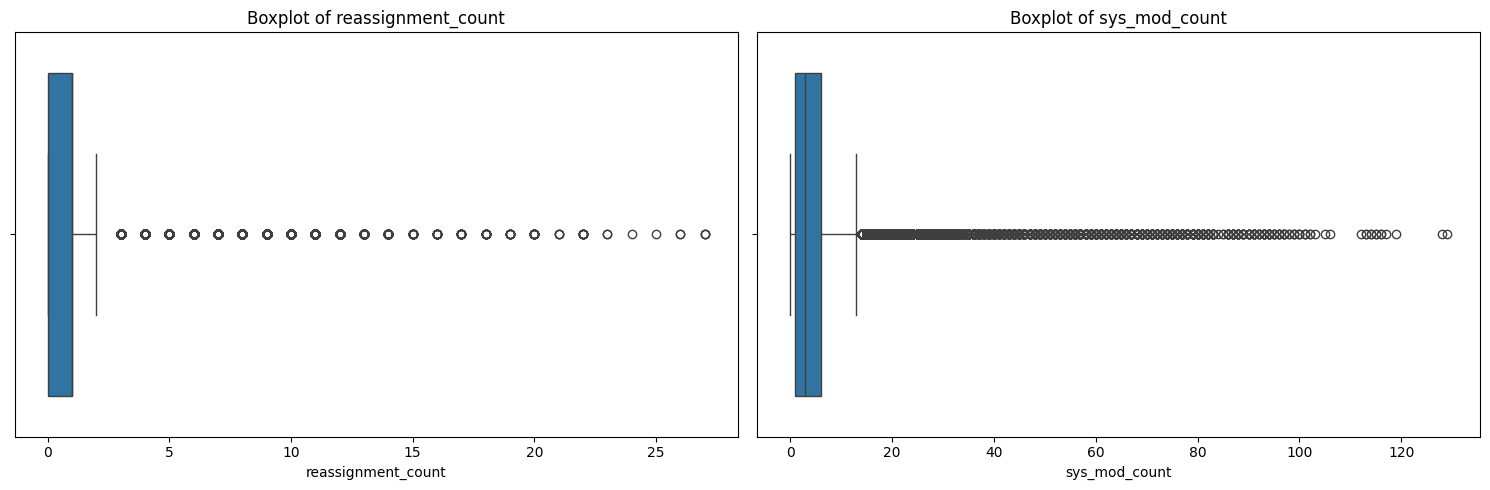

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


num_col = ['reassignment_count','sys_mod_count']
skewness = df[num_col].skew()
print("Skewness of numerical columns:\n", skewness)

plt.figure(figsize=(15, 5))  

for i, col in enumerate(num_col):
    plt.subplot(1, 2, i + 1)  
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    

plt.tight_layout()
plt.show()

In [11]:
df[['impact','urgency','priority']].tail(10)

,impact,urgency,priority
141702,2 - Medium,2 - Medium,3 - Moderate
141703,2 - Medium,2 - Medium,3 - Moderate
141704,2 - Medium,2 - Medium,3 - Moderate
141705,2 - Medium,2 - Medium,3 - Moderate
141706,2 - Medium,2 - Medium,3 - Moderate
141707,2 - Medium,2 - Medium,3 - Moderate
141708,2 - Medium,2 - Medium,3 - Moderate
141709,2 - Medium,2 - Medium,3 - Moderate
141710,2 - Medium,2 - Medium,3 - Moderate
141711,2 - Medium,2 - Medium,3 - Moderate


In [12]:
drop_cols = ['impact','urgency']  
df.drop(columns=drop_cols, inplace=True)

In [13]:
# not losing any minority class, all this belonged to 0 reopen count
df.dropna(subset=['resolved_at'], inplace=True)

In [14]:
df.drop(columns= ["caller_id",'opened_by','subcategory','assigned_to','closed_code',
                 'sys_created_by','sys_created_at','resolved_by'],axis = 1, 
       inplace = True)

In [15]:
df.columns

Index(['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'opened_at',
       'sys_updated_by', 'sys_updated_at', 'contact_type', 'location',
       'category', 'u_symptom', 'priority', 'assignment_group', 'knowledge',
       'u_priority_confirmation', 'notify', 'resolved_at', 'closed_at'],
      dtype='object')

In [16]:
df.shape

(138571, 21)

In [17]:
df.isnull().sum()

number                         0
incident_state                 0
active                         0
reassignment_count             0
reopen_count                   0
sys_mod_count                  0
made_sla                       0
opened_at                      0
sys_updated_by                 0
sys_updated_at                 0
contact_type                   0
location                      73
category                      78
u_symptom                  32155
priority                       0
assignment_group           14204
knowledge                      0
u_priority_confirmation        0
notify                         0
resolved_at                    0
closed_at                      0
dtype: int64

In [18]:
#extracting only the numeric value
import re
cols = ['location','category','u_symptom','assignment_group']

for col in cols:
    df[col] = df[col].str.extract('(\d+)', expand=False).astype(float)

In [19]:
df[cols] = df[cols].fillna(0).astype(int)

In [20]:
# after the data has been cleaned no presence of null values
df.isnull().sum()

number                     0
incident_state             0
active                     0
reassignment_count         0
reopen_count               0
sys_mod_count              0
made_sla                   0
opened_at                  0
sys_updated_by             0
sys_updated_at             0
contact_type               0
location                   0
category                   0
u_symptom                  0
priority                   0
assignment_group           0
knowledge                  0
u_priority_confirmation    0
notify                     0
resolved_at                0
closed_at                  0
dtype: int64

In [21]:
# convert to datetime format
datetime_cols = ['opened_at', 'resolved_at', 'closed_at']
for col in datetime_cols:
    df[col] = pd.to_datetime(df[col], dayfirst=True,errors='coerce')

In [22]:
df[['opened_at','resolved_at']].iloc[4:6]

,opened_at,resolved_at
4,2016-02-29 04:40:00,2016-03-01 09:52:00
5,2016-02-29 04:40:00,2016-03-01 09:52:00


In [23]:
df['reopen_count'].value_counts()

reopen_count
0    136261
1      1914
2       190
3       107
4        48
5        24
6        18
7         5
8         4
Name: count, dtype: int64

In [24]:
# clubbing all the minority class into 1
df['reopen_count'] = np.where(df['reopen_count'].isin([1,2,3,4,5,6,7,8]), 1, 0)


In [25]:
# final target class
df['reopen_count'].value_counts()

reopen_count
0    136261
1      2310
Name: count, dtype: int64

# Feature Engineering & EDA

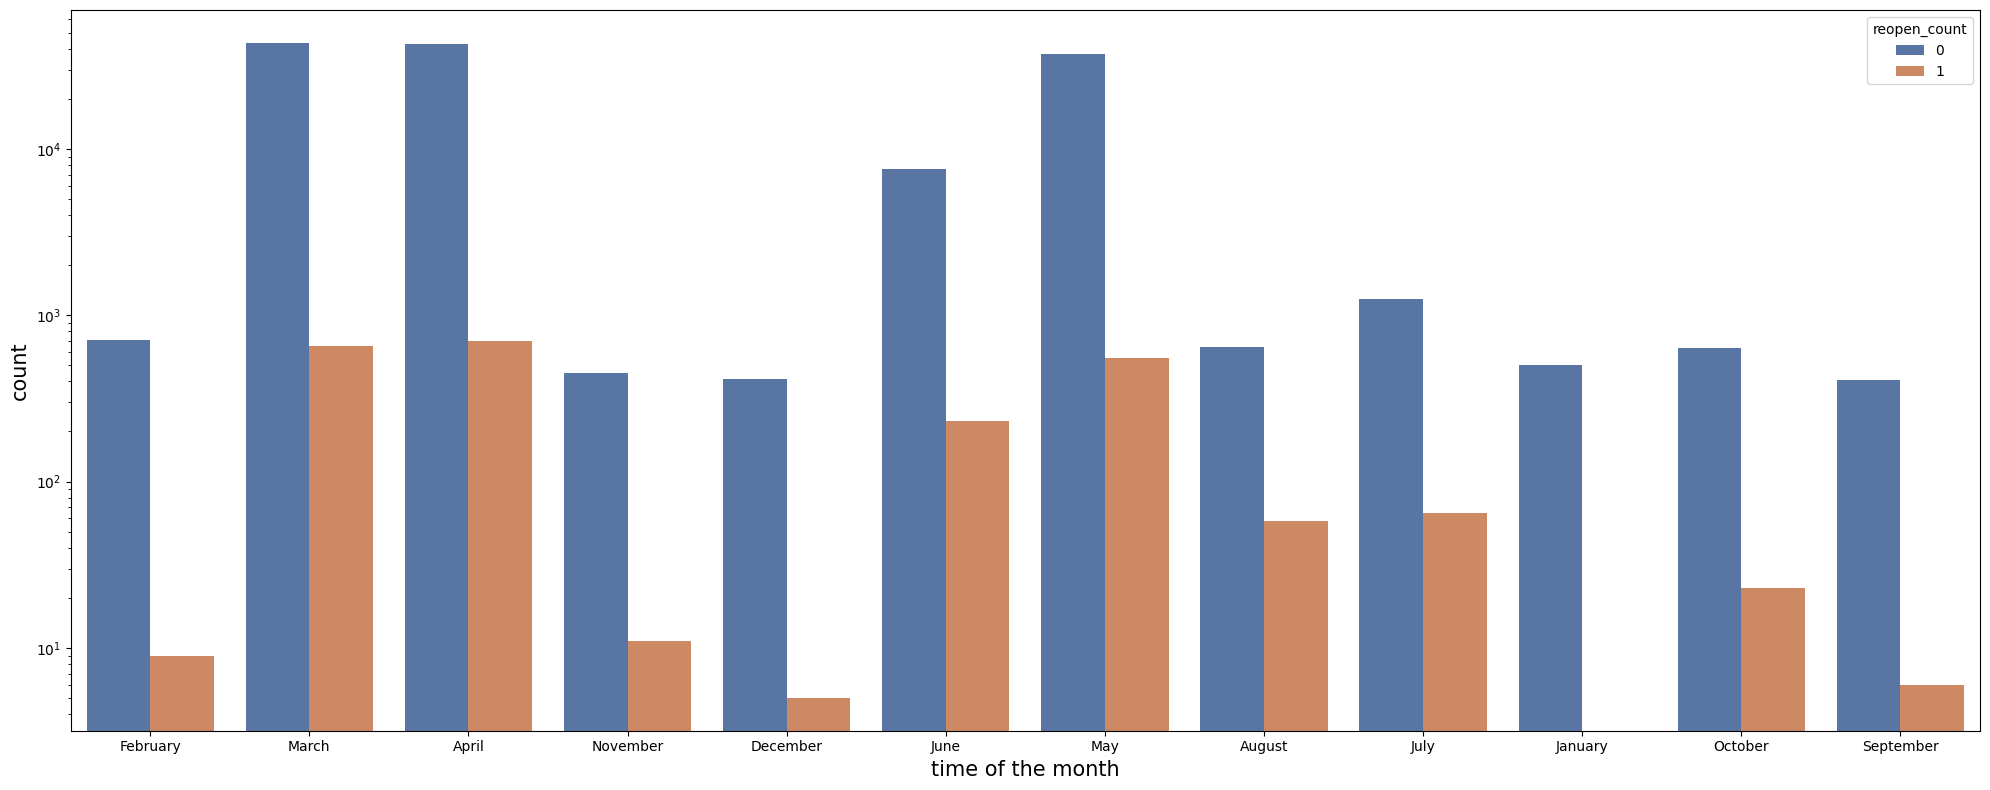

In [26]:
df['time of the month']=df['resolved_at'].dt.month_name()

# visualising reopening count against the months derived from "resolved_at" column.
countplt, ax = plt.subplots(figsize = (20,8))
ax =sns.countplot(x = 'time of the month', data=df,palette='deep',hue = "reopen_count")
ax.set_xlabel('time of the month', fontsize = 15)
ax.set_ylabel('count', fontsize = 15)
ax.set_yscale('log') 


plt.tight_layout()
plt.show()

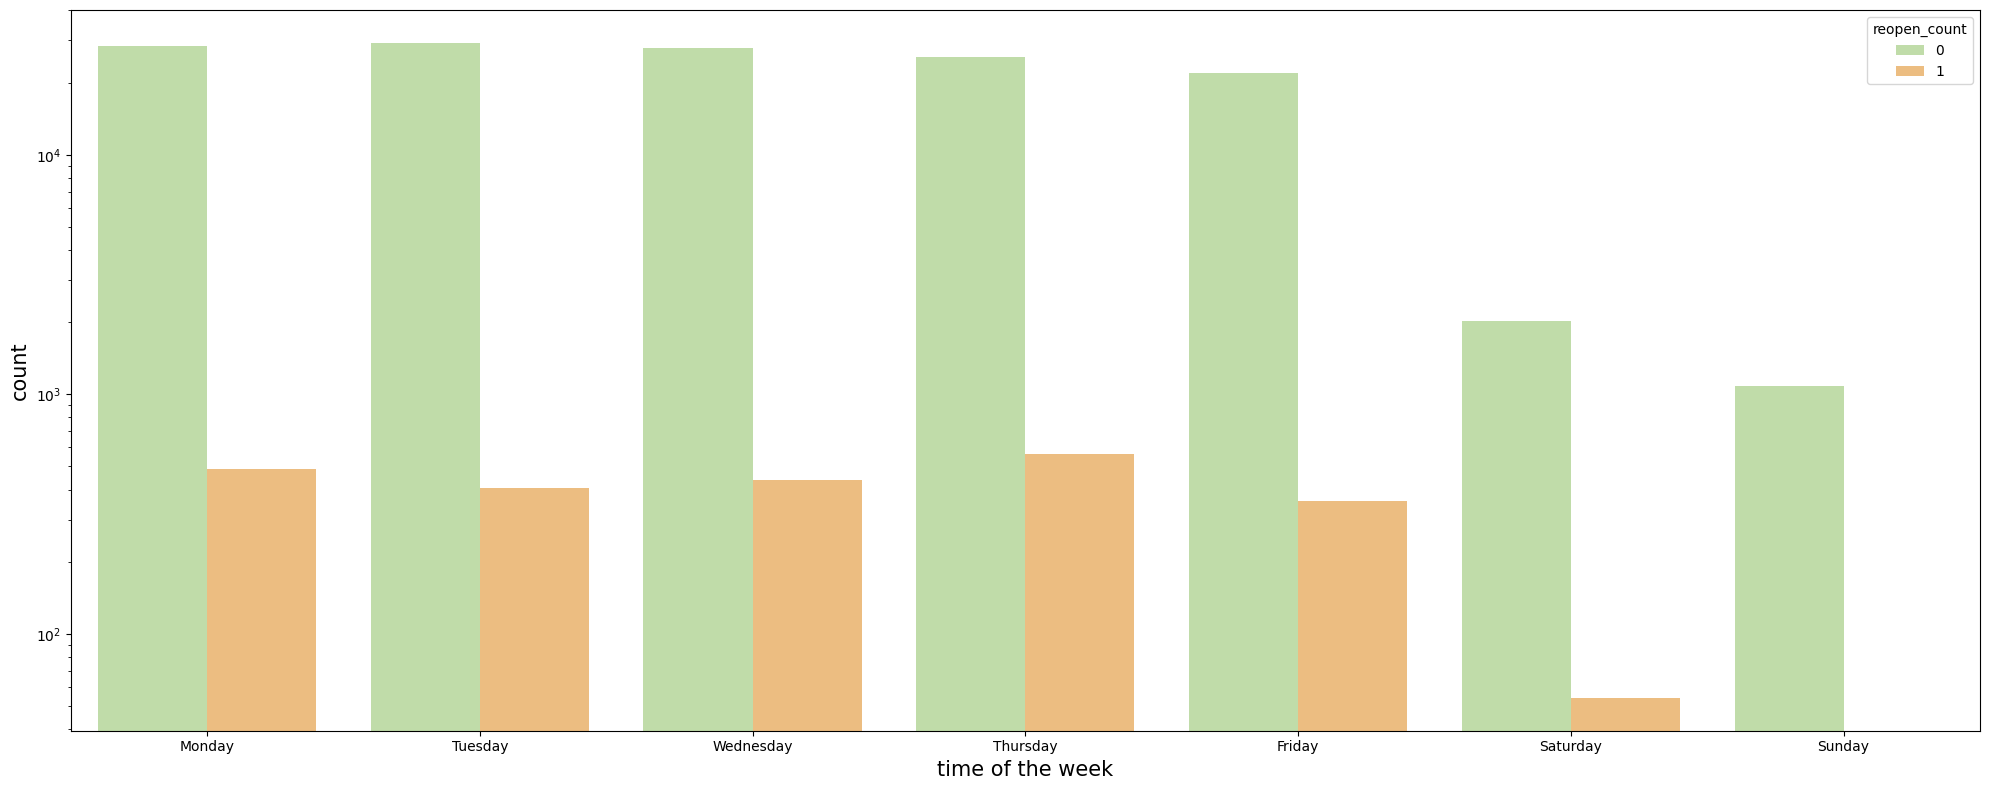

In [27]:
df['time of the week']=df['resolved_at'].dt.day_name()

# visualising reopening count against the days of the weeks derived from "resolved_at" column.
countplt, ax = plt.subplots(figsize = (20,8))
ax =sns.countplot(x = 'time of the week', data=df,palette='Spectral_r', hue='reopen_count')
ax.set_xlabel('time of the week', fontsize = 15)
ax.set_ylabel('count', fontsize = 15)
ax.set_yscale('log') 


plt.tight_layout()
plt.show()


In [28]:
# Using the else if function to classify the hours according to the time period.
def time_of_day(X):
    if X in range(6,12):
        return 'Morning'
    elif X in range(12,16):
        return 'Afternoon'
    elif X in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

# Using the hour function to extract the hours  
df['time of the day']=df['resolved_at'].dt.hour.apply(time_of_day)

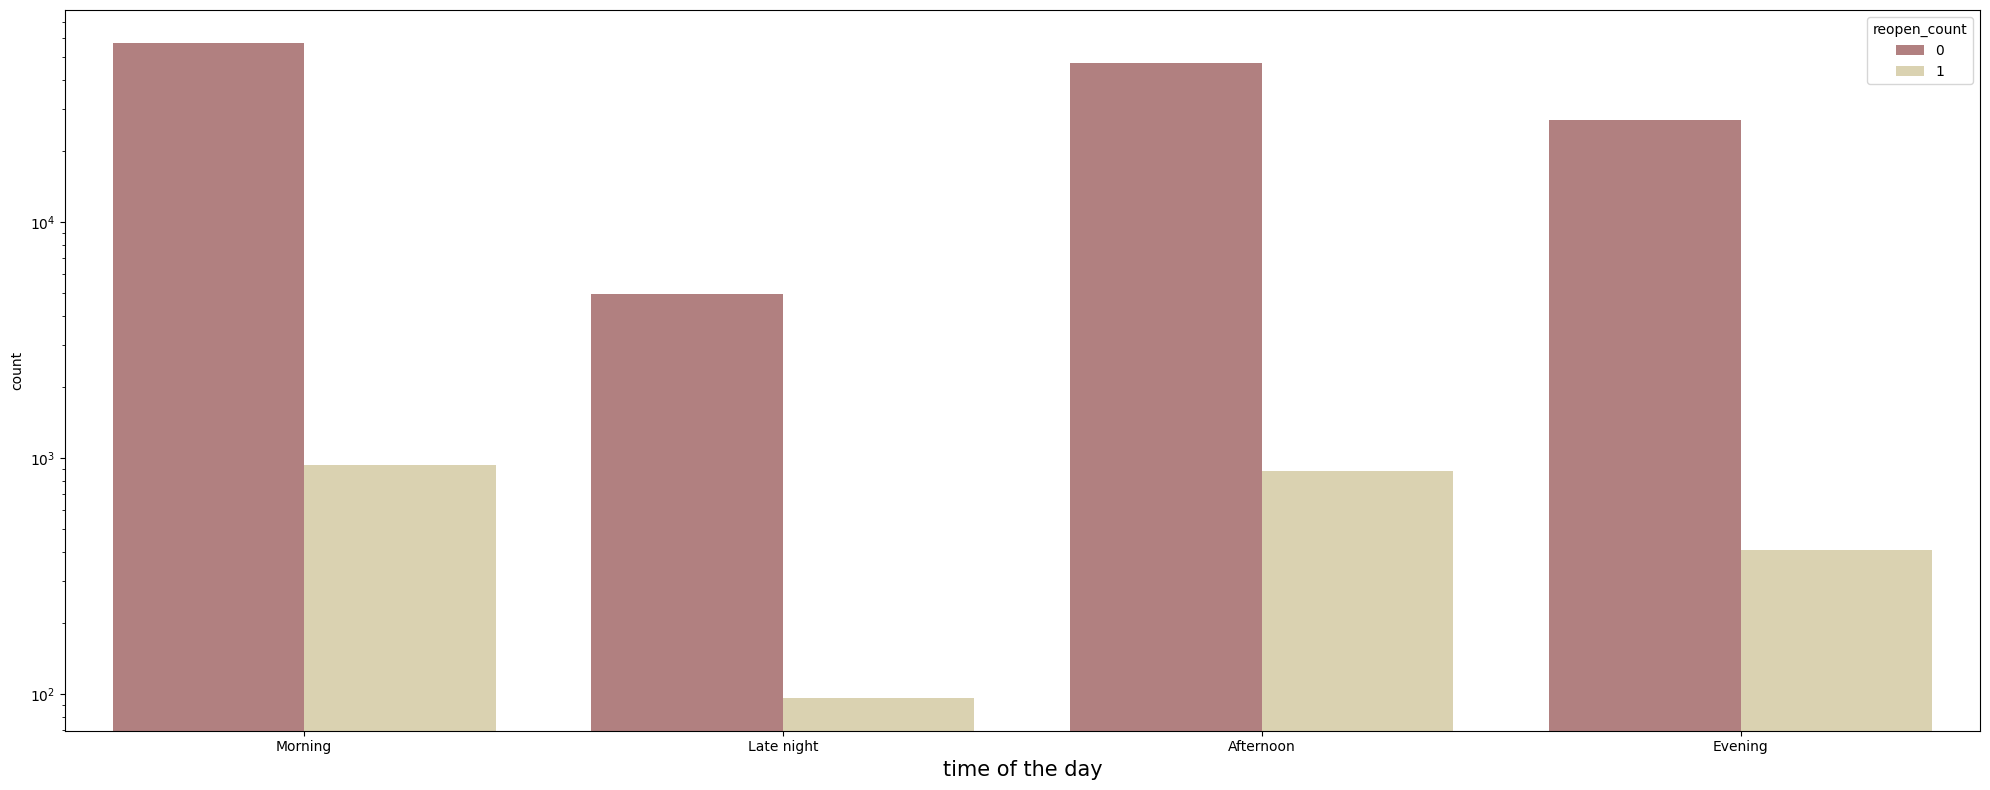

In [29]:
# Put the hours categorized into time frames into a countplot.
countplt, ax = plt.subplots(figsize = (20,8))
ax =sns.countplot(x = 'time of the day', data=df,palette='pink', hue='reopen_count')
ax.set_xlabel('time of the day', fontsize = 15)
ax.set_yscale('log') 

plt.tight_layout()
plt.show()


In [30]:
# only for visualisation purpose, so they are dropped later.
cols_to_drop= ['time of the month',
       'time of the week', 'time of the day']

df.drop(columns=cols_to_drop, inplace=True)

In [31]:
# Computing time durations in hours
df['resolution_time'] = (df['resolved_at'] - df['opened_at']).dt.total_seconds() / 3600
df['handling_time'] = (df['closed_at'] - df['opened_at']).dt.total_seconds() / 3600

In [32]:
df[['resolution_time','opened_at','resolved_at']].iloc[5:10]

,resolution_time,opened_at,resolved_at
5,29.2,2016-02-29 04:40:00,2016-03-01 09:52:00
6,29.2,2016-02-29 04:40:00,2016-03-01 09:52:00
7,29.2,2016-02-29 04:40:00,2016-03-01 09:52:00
8,29.2,2016-02-29 04:40:00,2016-03-01 09:52:00
9,29.2,2016-02-29 04:40:00,2016-03-01 09:52:00


In [33]:
def bin_resolution_time_unit(hours):
    if hours < 24:
        return 'Under 1 Day'
    elif hours < 168:
        return '1–7 Days'
    elif hours < 672:
        return '1–4 Weeks'
    elif hours < 8760:
        return '1–12 Months'
    else:
        return 'Over 1 Year'

df['resolution_bin'] = df['resolution_time'].apply(bin_resolution_time_unit)
df['handling_bin'] = df['handling_time'].apply(bin_resolution_time_unit)

In [34]:
# dropping the columns after binning
df.drop(columns=['resolution_time','handling_time'], axis = 1, inplace=True)

In [35]:
df['resolution_bin'].value_counts(dropna = False)

resolution_bin
Under 1 Day    48715
1–7 Days       41506
1–4 Weeks      36638
1–12 Months    11712
Name: count, dtype: int64

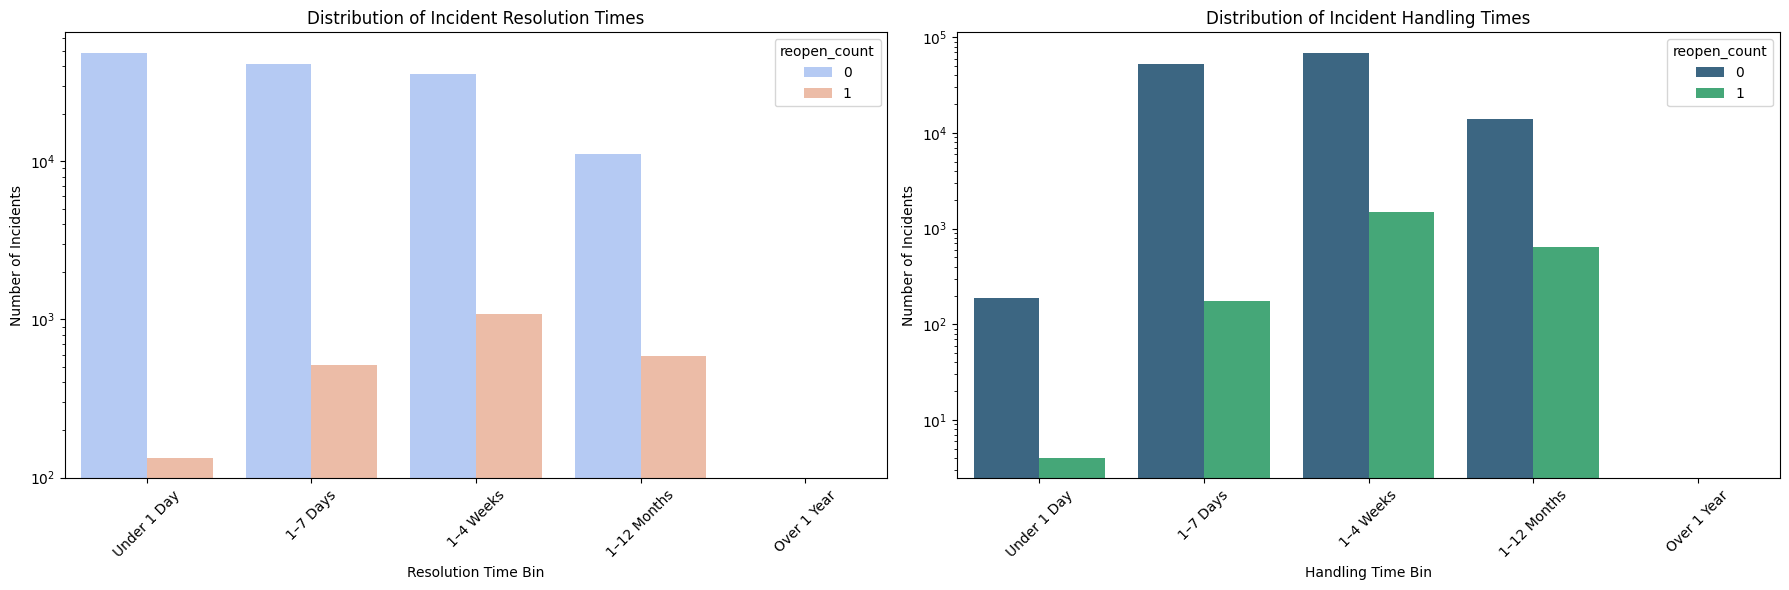

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plotting resolution time bin
sns.countplot(data=df, x='resolution_bin', hue = 'reopen_count', order=[
    'Under 1 Day', '1–7 Days', '1–4 Weeks', '1–12 Months', 'Over 1 Year'
], ax=axes[0], palette='coolwarm') 
axes[0].set_title('Distribution of Incident Resolution Times')
axes[0].set_xlabel('Resolution Time Bin')
axes[0].set_ylabel('Number of Incidents')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_yscale('log') 

# Plotting handling time bin
sns.countplot(data=df, x='handling_bin',hue = 'reopen_count', order=[
    'Under 1 Day', '1–7 Days', '1–4 Weeks', '1–12 Months', 'Over 1 Year'
], ax=axes[1], palette='viridis')  
axes[1].set_title('Distribution of Incident Handling Times')
axes[1].set_xlabel('Handling Time Bin')
axes[1].set_ylabel('Number of Incidents')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_yscale('log') 

plt.tight_layout()

plt.show()

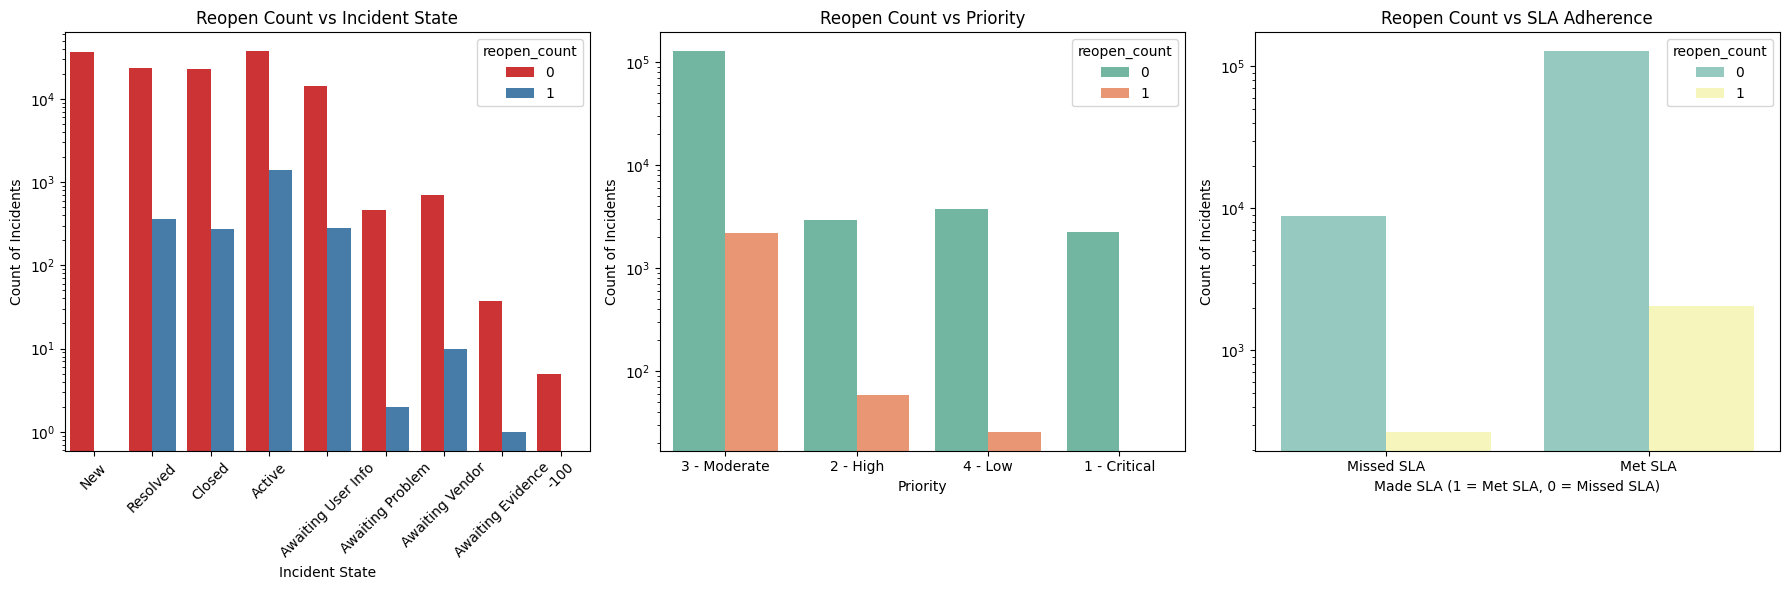

In [37]:
def visualize_reopen_counts(df):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Plot 1: Incident State vs Reopen Count
    sns.countplot(data=df, x='incident_state', hue='reopen_count', palette='Set1', ax=axes[0])
    axes[0].set_xlabel('Incident State')
    axes[0].set_ylabel('Count of Incidents')
    axes[0].set_title('Reopen Count vs Incident State')
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].set_yscale('log') 

    # Plot 2: Priority vs Reopen Count
    sns.countplot(data=df, x='priority', hue='reopen_count', palette='Set2', ax=axes[1])
    axes[1].set_xlabel('Priority')
    axes[1].set_ylabel('Count of Incidents')
    axes[1].set_title('Reopen Count vs Priority')
    axes[1].set_yscale('log') 

    # Plot 3: Made SLA vs Reopen Count
    sns.countplot(data=df, x='made_sla', hue='reopen_count', palette='Set3', ax=axes[2])
    axes[2].set_xlabel('Made SLA (1 = Met SLA, 0 = Missed SLA)')
    axes[2].set_ylabel('Count of Incidents')
    axes[2].set_title('Reopen Count vs SLA Adherence')
    axes[2].set_xticklabels(['Missed SLA', 'Met SLA'])
    axes[2].set_yscale('log') 

    plt.tight_layout()
    plt.show()


visualize_reopen_counts(df)

In [38]:
#function to calculate reopen rates for various columns
def compute_reopen_stats(df, group_col):
 
    total_tickets = df.groupby(group_col)['reopen_count'].transform('count')
    reopen_tickets = df.groupby(group_col)['reopen_count'].transform('sum')
    reopen_rate = reopen_tickets / total_tickets

    df[f'reopen_rate_{group_col}'] = reopen_rate
    
    return df

# For location
df = compute_reopen_stats(df, 'location')

# For category
df = compute_reopen_stats(df, 'category')

#for assignment group
df = compute_reopen_stats(df, 'assignment_group')

# for symptoms
df = compute_reopen_stats(df, 'u_symptom')

In [39]:
def bin_affected_service(rate):
    if rate >= 0.70:  
        return 'Very High Impact - Critical Issue'
    elif rate >= 0.02:  
        return 'Low Impact - Low Severity'
    elif rate >= 0.01:  
        return 'Minimal Impact - Very Low Severity'
    else:  
        return 'Negligible Impact - Insignificant Issue'

# Apply the binning function to your DataFrame
df['affected_service_category'] = df['reopen_rate_category'].apply(bin_affected_service)

In [40]:
df['affected_service_category'].value_counts()

affected_service_category
Minimal Impact - Very Low Severity         72514
Low Impact - Low Severity                  37115
Negligible Impact - Insignificant Issue    28865
Very High Impact - Critical Issue             77
Name: count, dtype: int64

In [41]:
def assign_risk_level(mean):
    if mean <= 0.05:
        return 'Very Stable Location'
    elif mean <= 0.10:
        return 'Stable Location'
    elif mean <= 0.25:
        return 'Moderate Risk Location'
    else:
        return 'High Risk Location'

df['location_risk_level'] = df['reopen_rate_location'].apply(assign_risk_level)

In [42]:
df['location_risk_level'].value_counts(dropna = False)

location_risk_level
Very Stable Location      136167
Stable Location             1881
Moderate Risk Location       283
High Risk Location           240
Name: count, dtype: int64

In [43]:
def bin_assignment_group(rate):
    if rate >= 0.08:  
        return 'frequent_reopens - needs urgent review'
    elif rate >= 0.06:  
        return 'often reopens - consider process review'
    elif rate >= 0.03:  
        return 'some reopens - room for improvement'
    else:  
        return 'mostly successful - stable group'

df['assign_group'] = df['reopen_rate_assignment_group'].apply(bin_assignment_group)

In [44]:
df['assign_group'].value_counts(dropna = False)

assign_group
mostly successful - stable group           128241
some reopens - room for improvement          9831
frequent_reopens - needs urgent review        258
often reopens - consider process review       241
Name: count, dtype: int64

In [45]:
def classify_sym(rate):
    if rate >= 0.15:
        return 'Critical Symptom'  
    elif rate >= 0.05:
        return 'Major Symptom'  
    else:
        return 'Minor Symptom'  

df['symptom']= df['reopen_rate_u_symptom'].apply(classify_sym)

In [46]:
df['symptom'].value_counts()

symptom
Minor Symptom       134834
Major Symptom         3394
Critical Symptom       343
Name: count, dtype: int64

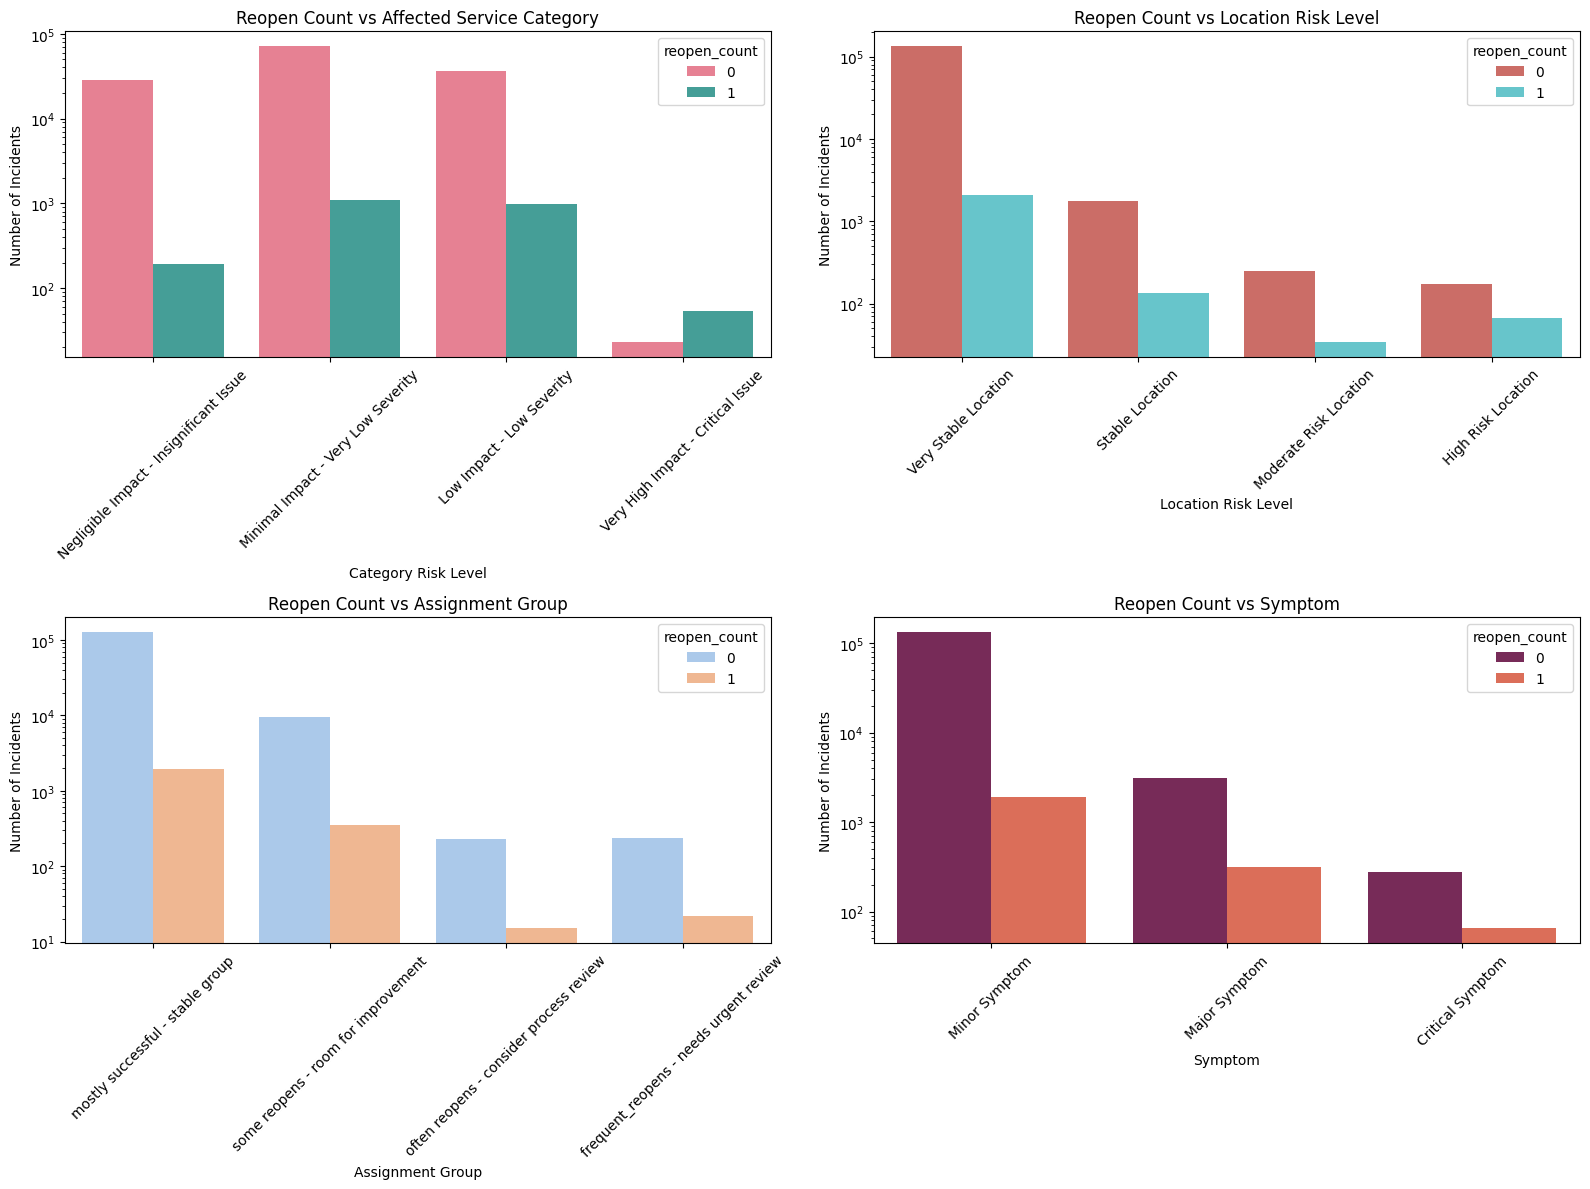

In [47]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# First plot: Count plot of 'affected_service_category' vs 'reopen_count'
sns.countplot(data=df, x='affected_service_category', hue='reopen_count', palette='husl', ax=axes[0, 0])
axes[0, 0].set_title('Reopen Count vs Affected Service Category')
axes[0, 0].set_xlabel('Category Risk Level')
axes[0, 0].set_ylabel('Number of Incidents')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].set_yscale('log')  

# Second plot: Count plot of 'location_risk_level' vs 'reopen_count'
sns.countplot(data=df, x='location_risk_level', hue='reopen_count', palette='hls', ax=axes[0, 1])
axes[0, 1].set_title('Reopen Count vs Location Risk Level')
axes[0, 1].set_xlabel('Location Risk Level')
axes[0, 1].set_ylabel('Number of Incidents')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].set_yscale('log')  

# Third plot: Count plot of 'assign_group' vs 'reopen_count'
sns.countplot(data=df, x='assign_group', hue='reopen_count', palette='pastel', ax=axes[1, 0])
axes[1, 0].set_title('Reopen Count vs Assignment Group')
axes[1, 0].set_xlabel('Assignment Group')
axes[1, 0].set_ylabel('Number of Incidents')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].set_yscale('log')  

# Fourth plot: Count plot of 'symptom' vs 'reopen_count'
sns.countplot(data=df, x='symptom', hue='reopen_count', palette='rocket', ax=axes[1, 1])
axes[1, 1].set_title('Reopen Count vs Symptom')
axes[1, 1].set_xlabel('Symptom')
axes[1, 1].set_ylabel('Number of Incidents')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].set_yscale('log')  

plt.tight_layout()

plt.show()


In [48]:
# drop certain columns after they have been binned into various categories
cols_to_drop= ['reopen_rate_location','reopen_rate_category','reopen_rate_assignment_group','reopen_rate_u_symptom']

df.drop(columns=cols_to_drop, inplace=True)

In [49]:
col = ['u_symptom','location', 'category', 'assignment_group','resolved_at','closed_at','opened_at','sys_updated_by', 'sys_updated_at','number']
df.drop(columns=col, inplace=True)

In [50]:
num_col = [fea for fea in df.columns if df[fea].dtype != 'O' and df[fea].dtype != 'bool']
cat_col = [fea for fea in df.columns if df[fea].dtype == 'O' or df[fea].dtype == 'bool']

print("NUM COL:", num_col)
print("CAT COL:",cat_col)

NUM COL: ['reassignment_count', 'reopen_count', 'sys_mod_count']
CAT COL: ['incident_state', 'active', 'made_sla', 'contact_type', 'priority', 'knowledge', 'u_priority_confirmation', 'notify', 'resolution_bin', 'handling_bin', 'affected_service_category', 'location_risk_level', 'assign_group', 'symptom']


In [51]:
df.shape

(138571, 17)

In [52]:
unique_entries = {col: df[col].nunique() for col in df.columns}
for col, unique_vals in unique_entries.items():
    print(f"Unique values in {col}: {unique_vals}")

Unique values in incident_state: 9
Unique values in active: 2
Unique values in reassignment_count: 28
Unique values in reopen_count: 2
Unique values in sys_mod_count: 115
Unique values in made_sla: 2
Unique values in contact_type: 4
Unique values in priority: 4
Unique values in knowledge: 2
Unique values in u_priority_confirmation: 2
Unique values in notify: 2
Unique values in resolution_bin: 4
Unique values in handling_bin: 4
Unique values in affected_service_category: 4
Unique values in location_risk_level: 4
Unique values in assign_group: 4
Unique values in symptom: 3


# Feature Importance

# Correlation

In [53]:
corr_matrix = df[num_col].corr()

label_correlation = corr_matrix['reopen_count'].sort_values(ascending=False)
corr_mat = label_correlation.drop('reopen_count')

print(corr_mat)

sys_mod_count         0.223300
reassignment_count    0.160032
Name: reopen_count, dtype: float64


# Chi Square Test

In [54]:
from scipy.stats import chi2_contingency

alpha = 0.05

for column in df.columns:
    if column != 'reopen_count':
        cont_table = pd.crosstab(df[column], df['reopen_count'])
        p_value = chi2_contingency(cont_table)[1]  
        
        print(f"{column} vs reopen_count : P-value = {p_value}")
        if p_value < alpha:
            print(f" The Null hypothesis is rejected, suggesting a significant association between {column} and reopen count") 
        else:
            print(f" Accept the null hypothesis. There is no significant association between {column} and reopen count")
                     
        
        print("="*40)

incident_state vs reopen_count : P-value = 0.0
 The Null hypothesis is rejected, suggesting a significant association between incident_state and reopen count
active vs reopen_count : P-value = 2.476974566091138e-10
 The Null hypothesis is rejected, suggesting a significant association between active and reopen count
reassignment_count vs reopen_count : P-value = 0.0
 The Null hypothesis is rejected, suggesting a significant association between reassignment_count and reopen count
sys_mod_count vs reopen_count : P-value = 0.0
 The Null hypothesis is rejected, suggesting a significant association between sys_mod_count and reopen count
made_sla vs reopen_count : P-value = 6.300510125976344e-23
 The Null hypothesis is rejected, suggesting a significant association between made_sla and reopen count
contact_type vs reopen_count : P-value = 0.14939306763607782
 Accept the null hypothesis. There is no significant association between contact_type and reopen count
priority vs reopen_count : P-val

In [55]:
# dropping columns where the chi square showed no association with the target variable
col = ['notify','contact_type']
df.drop(columns=col, inplace=True)

In [56]:
df['reopen_count'].value_counts()

reopen_count
0    136261
1      2310
Name: count, dtype: int64

In [57]:
# check duplicates
df.duplicated().sum()


np.int64(110730)

In [58]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [59]:
# the new shape after dropping duplicates
df.shape

(27841, 15)

In [60]:
df['reopen_count'].value_counts()

reopen_count
0    25765
1     2076
Name: count, dtype: int64

# Pipeline for Model Building & Evaluation

In [61]:
# since their is a class imbalance, we downsample the majorioty class 

reopen_0 = df[df['reopen_count'] == 0].sample(2100, random_state=42)
reopen_1 = df[df['reopen_count'] == 1]

df = pd.concat([reopen_0, reopen_1], axis=0)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

import gc
del reopen_0, reopen_1
gc.collect()

48949

In [62]:
# the newly balanced data which will be used for modelling
df['reopen_count'].value_counts()

reopen_count
0    2100
1    2076
Name: count, dtype: int64

In [63]:
from sklearn.model_selection import train_test_split

# segregating into x and y 
x= df.drop('reopen_count', axis=1)
y = df[['reopen_count']]

In [64]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Printing the shape of the split data
print(f"Training data shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Test data shape: X_test: {X_test.shape}, y_test: {y_test.shape}")


Training data shape: X_train: (3340, 14), y_train: (3340, 1)
Test data shape: X_test: (836, 14), y_test: (836, 1)


In [65]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

num_col = [fea for fea in X_train.columns if X_train[fea].dtype != 'O' and X_train[fea].dtype != 'bool']
cat_col = [fea for fea in X_train.columns if X_train[fea].dtype == 'O' or X_train[fea].dtype == 'bool']

num_trans = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  
    ('scaler', StandardScaler())  
])

cat_trans = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('odi', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))  
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_trans, num_col),
        ('cat', cat_trans, cat_col)
    ]
)

X_train_transformed = preprocessor.fit_transform(X_train)

X_test_transformed = preprocessor.transform(X_test)

# Random Forest Classifier

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [10, 20],                          
    'max_depth': [2, 5, 10],                           
    'min_samples_split': [10, 20],                       
    'min_samples_leaf': [5, 10],                        
    'max_features': ['log2', None],                      
    'criterion': ['entropy']     
          
}

stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=rf_model, 
    param_grid=param_grid, 
    scoring='f1',          
    cv=stratified_kfold,        
    verbose=2,                  
    n_jobs=-1                  
)


grid_search.fit(X_train_transformed, y_train)
best_rf_model = grid_search.best_estimator_

y_train_pred = best_rf_model.predict(X_train_transformed)
y_test_pred_rf = best_rf_model.predict(X_test_transformed)

train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy for RF Model:", train_accuracy)

test_accuracy = accuracy_score(y_test, y_test_pred_rf)
print("Test Accuracy for RF Model:", test_accuracy)

# eval metrics
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_rf))

print("\nConfusion Matrix:")
print (confusion_matrix(y_test,  y_test_pred_rf))

print("\nROC_AUC Score:")
print(roc_auc_score(y_test, y_test_pred_rf))

# feature importances 
feature_importances = best_rf_model.feature_importances_

feature_names = num_col + cat_col

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances from RF Model:")
print(importance_df)

print("\nBest Hyperparameters from GridSearchCV:")
print(grid_search.best_params_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Train Accuracy for RF Model: 0.9179640718562875
Test Accuracy for RF Model: 0.9043062200956937

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       419
           1       0.91      0.90      0.90       417

    accuracy                           0.90       836
   macro avg       0.90      0.90      0.90       836
weighted avg       0.90      0.90      0.90       836


Confusion Matrix:
[[380  39]
 [ 41 376]]

ROC_AUC Score:
0.9042999490622298

Feature Importances from RF Model:
                      Feature  Importance
7     u_priority_confirmation    0.280870
2              incident_state    0.230757
1               sys_mod_count    0.157753
0          reassignment_count    0.081250
5                    priority    0.075696
10  affected_service_category    0.049158
6                   knowledge    0.045503
9                handling_bin    0.029462
1

# Decision Tree Classifier

In [67]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier( random_state=42)

param_grid = {
    'max_depth': [5, 10, 15, None],          
    'min_samples_split': [2, 5, 10],         
    'min_samples_leaf': [1, 2, 4],          
    'criterion': ['gini', 'entropy']         
}

stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    scoring='f1',                
    cv=stratified_kfold,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train_transformed, y_train)
best_dt_model = grid_search.best_estimator_

y_train_pred = best_dt_model.predict(X_train_transformed)
y_test_pred_dt = best_dt_model.predict(X_test_transformed)

train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy for DT Model:", train_accuracy)
print("Test Accuracy for DT Model:", accuracy_score(y_test, y_test_pred_dt))

#eval metrics
print("\nClassification Report (Decision Tree):")

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_dt))

print("\nConfusion Matrix:")
print (confusion_matrix(y_test,  y_test_pred_dt))

print("\nROC_AUC Score:")
print(roc_auc_score(y_test, y_test_pred_dt))

# Feature importance
feature_importance = best_dt_model.feature_importances_
feature_names = num_col + cat_col

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print("\nTop Feature Importances:")
print(importance_df.head(10))

print("\nBest Hyperparameters:")
print(grid_search.best_params_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Train Accuracy for DT Model: 0.915868263473054
Test Accuracy for DT Model: 0.8744019138755981

Classification Report (Decision Tree):

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       419
           1       0.86      0.89      0.88       417

    accuracy                           0.87       836
   macro avg       0.87      0.87      0.87       836
weighted avg       0.87      0.87      0.87       836


Confusion Matrix:
[[359  60]
 [ 45 372]]

ROC_AUC Score:
0.8744441201215639

Top Feature Importances:
                      Feature  Importance
7     u_priority_confirmation    0.355347
2              incident_state    0.198904
1               sys_mod_count    0.139664
5                    priority    0.063036
0          reassignment_count    0.056162
10  affected_service_category    0.052264
9                handling_bin    0.041853
6             

# Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear', random_state=42)

param_grid = {
    'penalty': ['l1', 'l2'],             
    'C': [0.01, 0.1, 1, 10, 100]      
}

stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='f1',                    
    cv=stratified_kfold,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train_transformed, y_train)
best_log_reg = grid_search.best_estimator_

y_train_pred = best_log_reg.predict(X_train_transformed)
y_test_pred_log = best_log_reg.predict(X_test_transformed)

print("Train Accuracy for Logistic regression Model:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy for Logistic regression Model:", accuracy_score(y_test, y_test_pred_log))

#eval metrics
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_test_pred_log))

print("\nConfusion Matrix:")
print (confusion_matrix(y_test,  y_test_pred_log))

print("\nROC_AUC Score:")
print(roc_auc_score(y_test, y_test_pred_log))

print("\nBest Hyperparameters:")
print(grid_search.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Train Accuracy for Logistic regression Model: 0.8023952095808383
Test Accuracy for Logistic regression Model: 0.7954545454545454

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       419
           1       0.80      0.79      0.79       417

    accuracy                           0.80       836
   macro avg       0.80      0.80      0.80       836
weighted avg       0.80      0.80      0.80       836


Confusion Matrix:
[[335  84]
 [ 87 330]]

ROC_AUC Score:
0.7954447897529233

Best Hyperparameters:
{'C': 100, 'penalty': 'l1'}


# LightGBM Classifier

In [69]:
import lightgbm as lgb
warnings.filterwarnings("ignore", category=UserWarning, module="lightgbm")


lgbm_clf = lgb.LGBMClassifier(random_state=42)

param_grid = {
    'n_estimators': [300,500],              
    'max_depth': [10,15],                     
    'learning_rate': [0.05, 0.01],                
    'min_child_samples': [30,40],               
    'num_leaves': [40,60],                      
    'boosting_type': ['gbdt'],                   
    'objective': ['binary'],
    'metric': ['auc','binary_logloss']
}


stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=lgbm_clf,
    param_grid=param_grid,
    scoring='f1',  
    cv=stratified_kfold,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train_transformed, y_train)
best_lgbm_model = grid_search.best_estimator_

y_train_pred = best_lgbm_model.predict(X_train_transformed)
y_test_pred_lgbm = best_lgbm_model.predict(X_test_transformed)

train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy for LGBM Model:", train_accuracy)
print("Test Accuracy for LGBM Model:", accuracy_score(y_test, y_test_pred_lgbm))

# eval metrics
print("\nClassification Report (LightGBM):")
print(classification_report(y_test, y_test_pred_lgbm))

print("\nConfusion Matrix:")
print (confusion_matrix(y_test,  y_test_pred_lgbm))

print("\nROC_AUC Score:")
print(roc_auc_score(y_test, y_test_pred_lgbm))

# Feature importance
feature_importance = best_lgbm_model.feature_importances_
feature_names = num_col + cat_col

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print("\nTop Feature Importances:")
print(importance_df.head(10))

print("\nBest Hyperparameters from GridSearchCV:")
print(grid_search.best_params_)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
[LightGBM] [Info] Number of positive: 1659, number of negative: 1681
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 144
[LightGBM] [Info] Number of data points in the train set: 3340, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496707 -> initscore=-0.013174
[LightGBM] [Info] Start training from score -0.013174
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

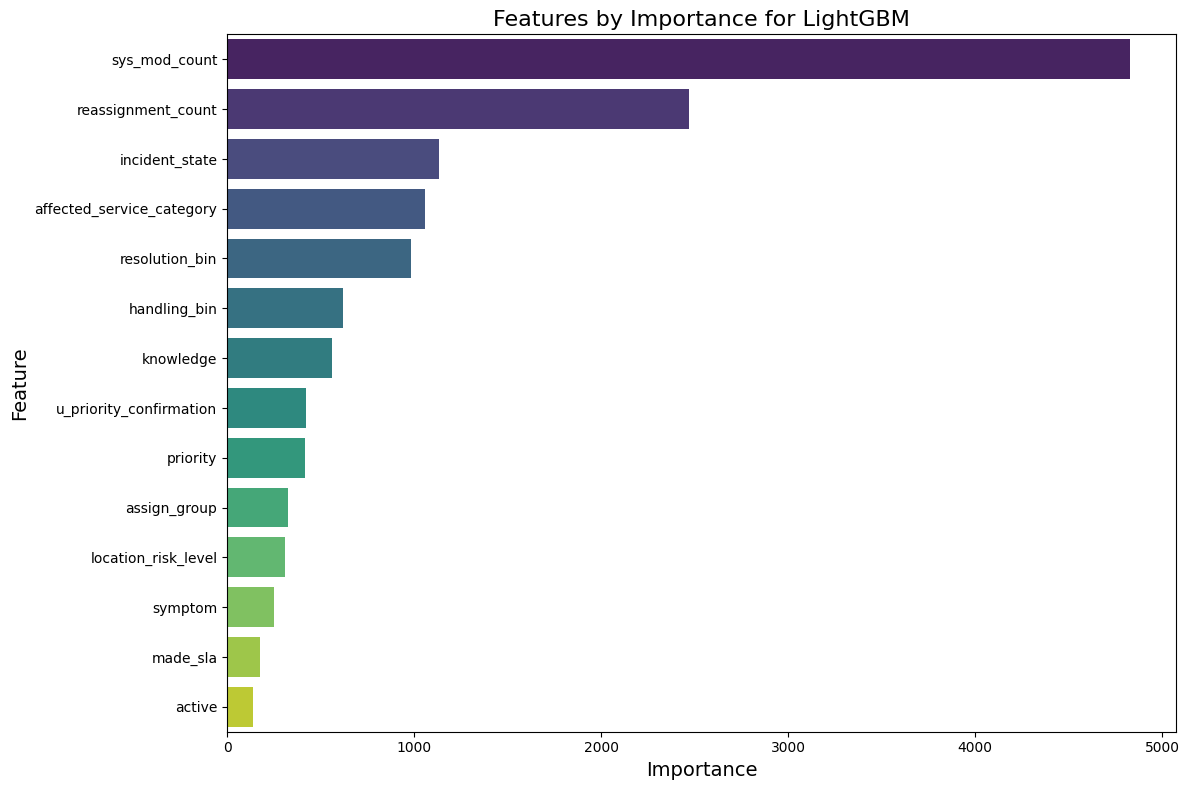

In [70]:
plt.figure(figsize=(12, 8))

sns.barplot(data=importance_df.head(15), x='Importance', y='Feature', palette='viridis')

plt.title('Features by Importance for LightGBM', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)

plt.tight_layout()
plt.show()


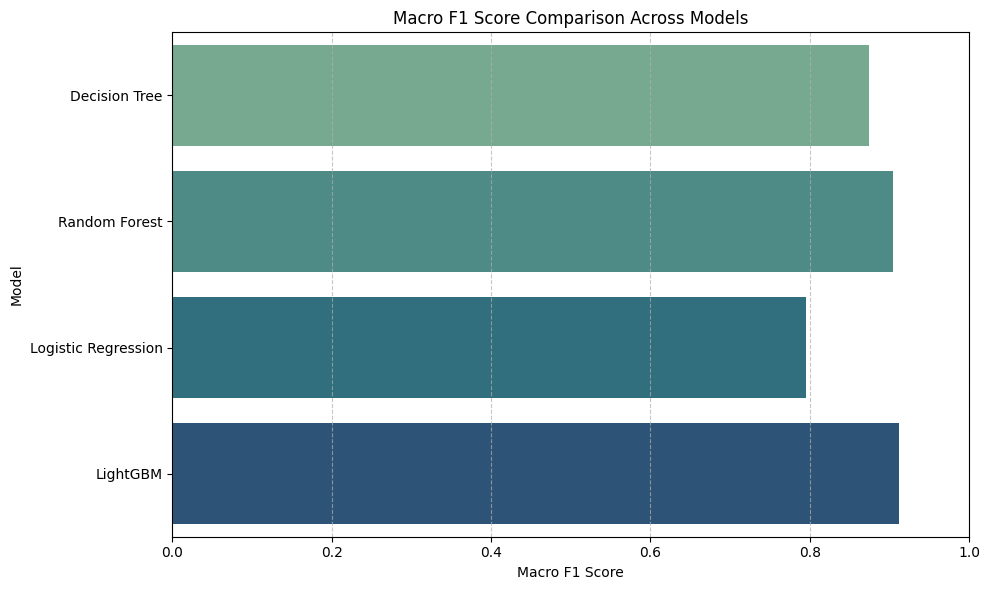

In [71]:
# getting macro F1 scores
dt_macro_f1 = classification_report(y_test, y_test_pred_dt, output_dict=True)['macro avg']['f1-score']
rf_macro_f1 = classification_report(y_test, y_test_pred_rf, output_dict=True)['macro avg']['f1-score']
log_macro_f1 = classification_report(y_test, y_test_pred_log, output_dict=True)['macro avg']['f1-score']
lgbm_macro_f1 = classification_report(y_test, y_test_pred_lgbm, output_dict=True)['macro avg']['f1-score']


# dict of Macro F1 Scores
model_scores = {
    'Decision Tree': dt_macro_f1,
    'Random Forest': rf_macro_f1,
    'Logistic Regression': log_macro_f1,
    'LightGBM': lgbm_macro_f1
}

# plotting it
plt.figure(figsize=(10, 6))
sns.barplot(y=list(model_scores.keys()), x=list(model_scores.values()), palette='crest')
plt.title("Macro F1 Score Comparison Across Models")
plt.xlabel("Macro F1 Score")
plt.ylabel("Model")
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The LightGBM model is the best for predicting incident re-openings, based on its:

False Positives & False Negatives: It achieves the lowest rates, with only 33 false positives and 40 false negatives, indicating fewer misclassifications.

F1 Score: With a strong F1 score of 91%, LightGBM strikes a good balance between precision and recall.

ROC Curve: An AUC of 91% demonstrates its excellent ability to distinguish between reopened and non-reopened incidents.

Overall, LightGBM's combination of low misclassifications, high F1 score, and strong ROC performance makes it ideal for improving incident management by accurately predicting re-openings.